In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [2]:
data=pd.read_csv('weather_data.csv')
data

,Year,Day,Wind Speed,Specific Humidity,Relative Humidity,Precipitation,Temperature
0,1990,1,1.08,5.68,53.06,0.0,16.33
1,1990,2,1.13,5.92,58.06,0.0,15.68
2,1990,3,1.33,5.68,52.69,0.0,16.56
3,1990,4,1.09,5.19,47.19,0.0,17.09
4,1990,5,0.94,4.82,42.88,0.0,17.26
...,...,...,...,...,...,...,...
12108,2023,56,1.28,8.85,50.44,0.0,24.52
12109,2023,57,1.41,6.59,38.06,0.0,24.62
12110,2023,58,1.60,6.04,34.56,0.0,24.28
12111,2023,59,1.49,6.65,38.94,0.0,23.97


In [3]:
data.head()

,Year,Day,Wind Speed,Specific Humidity,Relative Humidity,Precipitation,Temperature
0,1990,1,1.08,5.68,53.06,0.0,16.33
1,1990,2,1.13,5.92,58.06,0.0,15.68
2,1990,3,1.33,5.68,52.69,0.0,16.56
3,1990,4,1.09,5.19,47.19,0.0,17.09
4,1990,5,0.94,4.82,42.88,0.0,17.26


In [4]:
data.isnull().sum()

Year                 0
Day                  0
Wind Speed           0
Specific Humidity    0
Relative Humidity    0
Precipitation        0
Temperature          0
dtype: int64

In [5]:
data.dropna()

,Year,Day,Wind Speed,Specific Humidity,Relative Humidity,Precipitation,Temperature
0,1990,1,1.08,5.68,53.06,0.0,16.33
1,1990,2,1.13,5.92,58.06,0.0,15.68
2,1990,3,1.33,5.68,52.69,0.0,16.56
3,1990,4,1.09,5.19,47.19,0.0,17.09
4,1990,5,0.94,4.82,42.88,0.0,17.26
...,...,...,...,...,...,...,...
12108,2023,56,1.28,8.85,50.44,0.0,24.52
12109,2023,57,1.41,6.59,38.06,0.0,24.62
12110,2023,58,1.60,6.04,34.56,0.0,24.28
12111,2023,59,1.49,6.65,38.94,0.0,23.97


In [6]:
data.isnull().sum()

Year                 0
Day                  0
Wind Speed           0
Specific Humidity    0
Relative Humidity    0
Precipitation        0
Temperature          0
dtype: int64

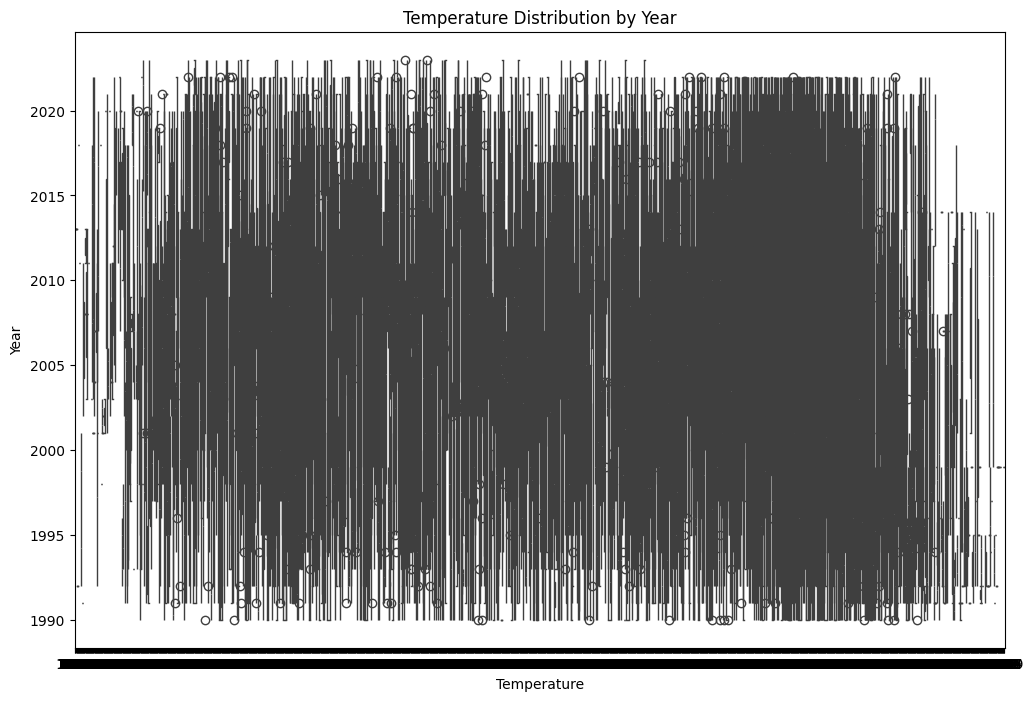

In [7]:
# Create boxplot using Seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(y='Year',x='Temperature', data=data)
plt.title('Temperature Distribution by Year')
plt.xlabel('Temperature')
plt.ylabel('Year')
plt.show()

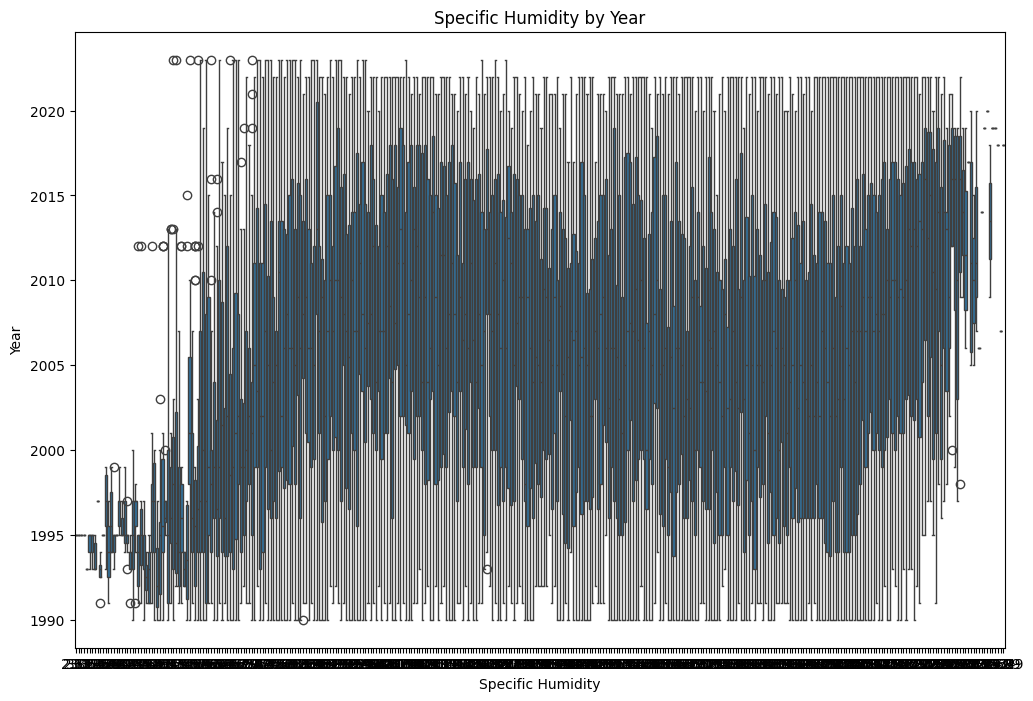

In [8]:
# Create boxplot using Seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(y='Year', x='Specific Humidity', data=data)
plt.title('Specific Humidity by Year')
plt.show()

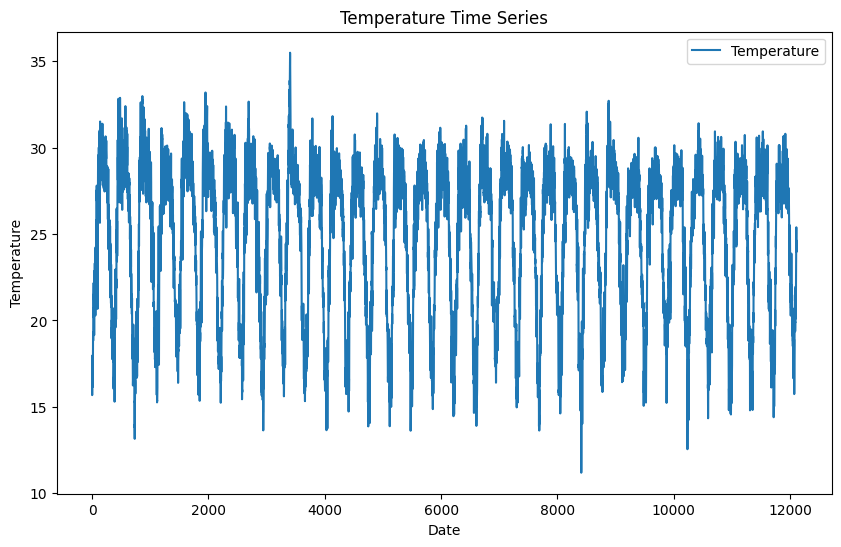

ADF Statistic: -11.551618629855165
p-value: 3.436515118758798e-21
Series is stationary


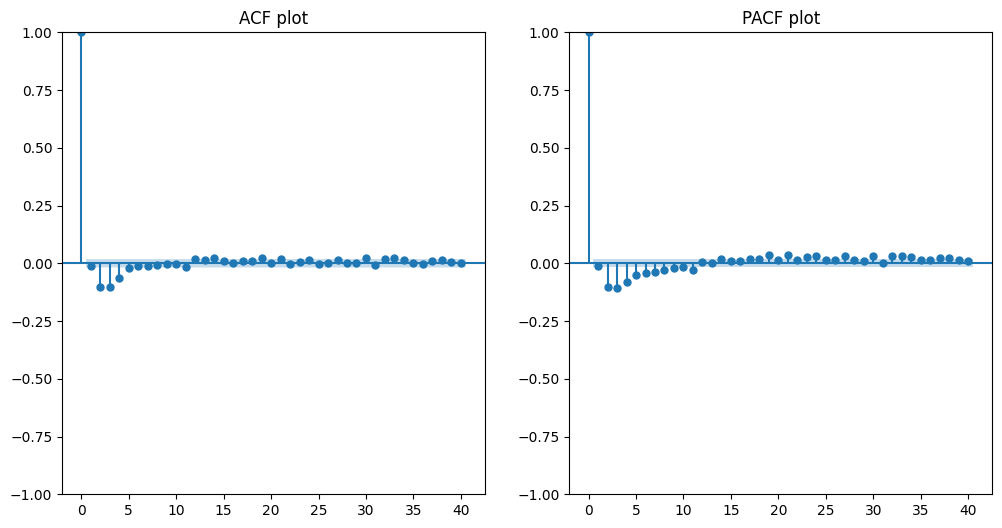

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                          Temperature   No. Observations:                12113
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 12)   Log Likelihood              -14442.197
Date:                              Sun, 13 Oct 2024   AIC                          28898.394
Time:                                      21:20:55   BIC                          28950.201
Sample:                                           0   HQIC                         28915.766
                                            - 12113                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9629      0.080     12.084      0.000       0.807       1.119
ar.L2         -0.29

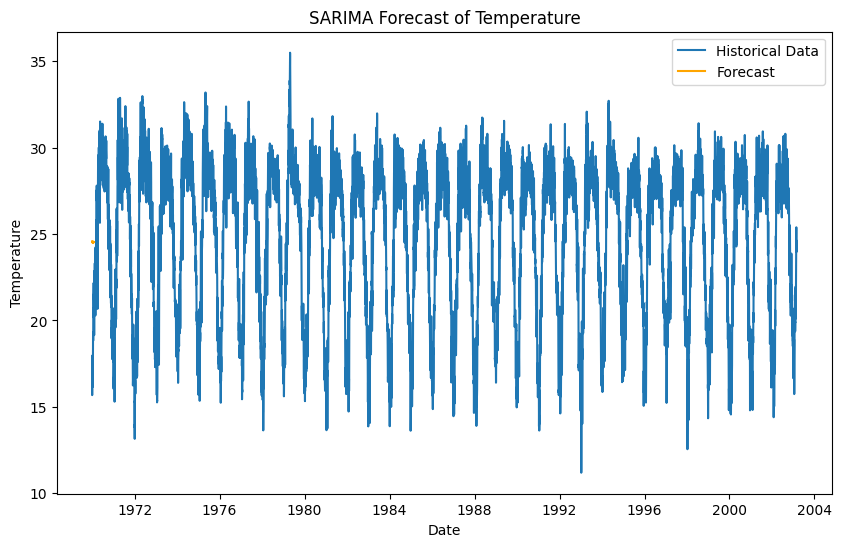

In [9]:
# Step 1: Visualize the time series
plt.figure(figsize=(10, 6))
plt.plot(data['Temperature'], label='Temperature')
plt.title('Temperature Time Series')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

# Step 2: Check for stationarity using the Augmented Dickey-Fuller (ADF) test
def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    if result[1] > 0.05:
        print("Series is non-stationary")
    else:
        print("Series is stationary")
check_stationarity(data['Temperature'])

# Step 3: Perform differencing if necessary (only if the series is non-stationary)
data['Temperature_diff'] = data['Temperature'].diff().dropna()

# Step 4: Plot ACF and PACF to determine ARIMA parameters
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(data['Temperature_diff'].dropna(), lags=40, ax=plt.gca())
plt.title('ACF plot')
plt.subplot(122)
plot_pacf(data['Temperature_diff'].dropna(), lags=40, ax=plt.gca())
plt.title('PACF plot')
plt.show()

# Step 5: Fit the SARIMA model
# Specify your (p, d, q) values and (P, D, Q, S) based on ACF/PACF plots
# Example: SARIMA(2, 1, 2)(1, 1, 1, 12)
model = SARIMAX(data['Temperature'], order=(2, 1, 2), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

# Step 6: Print the model summary
print(model_fit.summary())

# Step 7: Forecast future values (e.g., next 30 periods)
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)

# Step 8: Visualize the forecast along with historical data
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Temperature'], label='Historical Data')
plt.plot(pd.date_range(data.index[-1], periods=forecast_steps + 1, freq='D')[1:], forecast, label='Forecast', color='orange')
plt.title('SARIMA Forecast of Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Standard Errors (std err):
ar.L1       0.079688
ar.L2       0.063102
ma.L1       0.081086
ma.L2       0.072112
ar.S.L12    0.009163
ma.S.L12    0.027466
sigma2      0.018126
dtype: float64


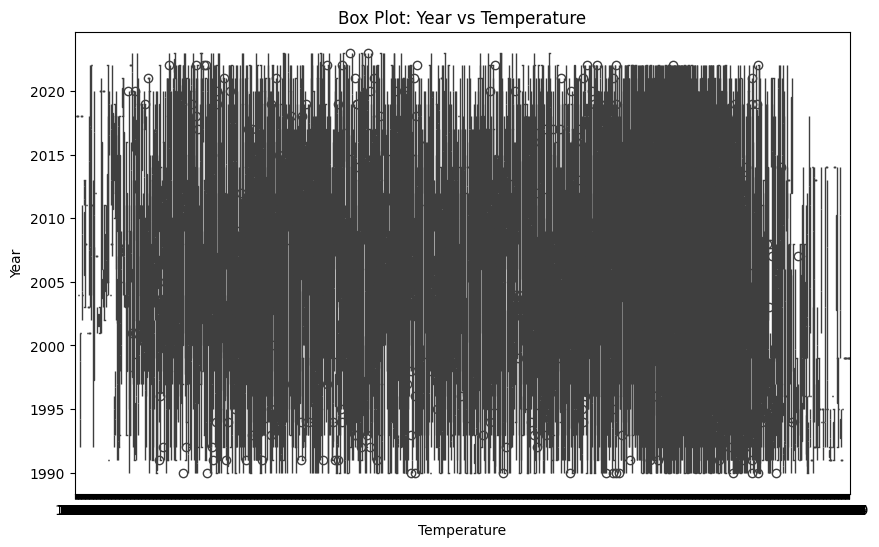

In [10]:
model = SARIMAX(data['Temperature'], order=(2, 1, 2), seasonal_order=(1, 1, 1, 12))  
# Using (2, 1, 2) as an example for the non-seasonal components and (1, 1, 1, 12) for the seasonal components
model_fit = model.fit()

# Extracting standard errors (from the SARIMA model summary)
model_summary = model_fit.summary()
std_errors = model_fit.bse  # This will give you the standard errors

# Print out the standard errors
print("Standard Errors (std err):")
print(std_errors)

#Create a box plot of Year vs Temperature
plt.figure(figsize=(10, 6))
sns.boxplot(y='Year', x='Temperature', data=data)
plt.title('Box Plot: Year vs Temperature')
plt.ylabel('Year')
plt.xlabel('Temperature')
plt.show()